In [58]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
taxi = pd.read_csv('nyc.csv.zip', compression='zip')

In [49]:
taxi.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [5]:
taxi.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
def haversine(pic_long, pic_lat, d_long, d_lat, radius = 6371):
    pic_long = np.radians(pic_long)
    pic_lat = np.radians(pic_lat)
    d_long = np.radians(d_long)
    d_lat = np.radians(d_lat)
    temp = (((np.sin((d_lat - pic_lat)/2)) ** 2) + np.cos(pic_lat)*np.cos(d_lat) * ((np.sin((d_long - pic_long)/2)) ** 2)) ** 0.5
    d = 2 * radius * np.arcsin(temp)
    return(d)
    
    

In [10]:
haversine(-73.844311, 40.721319, -73.841610, 40.712278)

1.030763935049508

In [30]:
taxi['distance'] = pd.Series(haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']) for i, row in taxi.iterrows())

In [25]:
taxi.shape

(50000, 9)

In [26]:
timeit

In [38]:
for row in taxi[:13].itertuples():
    print(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude))

1.030763935048818
8.450133595805992
1.3895252257697308
2.799270239983498
1.9991567879958214
3.7872390847819912
1.5558066593500526
4.155444291845812
1.253231512725298
2.849626796107395
1.374576999593841
0.0
0.7177674874531168


In [40]:
taxi['distance'] = pd.Series(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude) for  row in taxi.itertuples())

In [43]:
taxi['distance'] = taxi[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

In [45]:
longest = taxi.distance.max()

8667.818812217454

In [48]:
taxi['distance'] = haversine(taxi['pickup_longitude'].values, taxi['pickup_latitude'].values, taxi['dropoff_longitude'].values, taxi['dropoff_latitude'].values)

In [51]:
taxi.query('dropoff_longitude == 0 or dropoff_latitude == 0').count()

key                  958
fare_amount          958
pickup_datetime      958
pickup_longitude     958
pickup_latitude      958
dropoff_longitude    958
dropoff_latitude     958
passenger_count      958
distance             958
dtype: int64

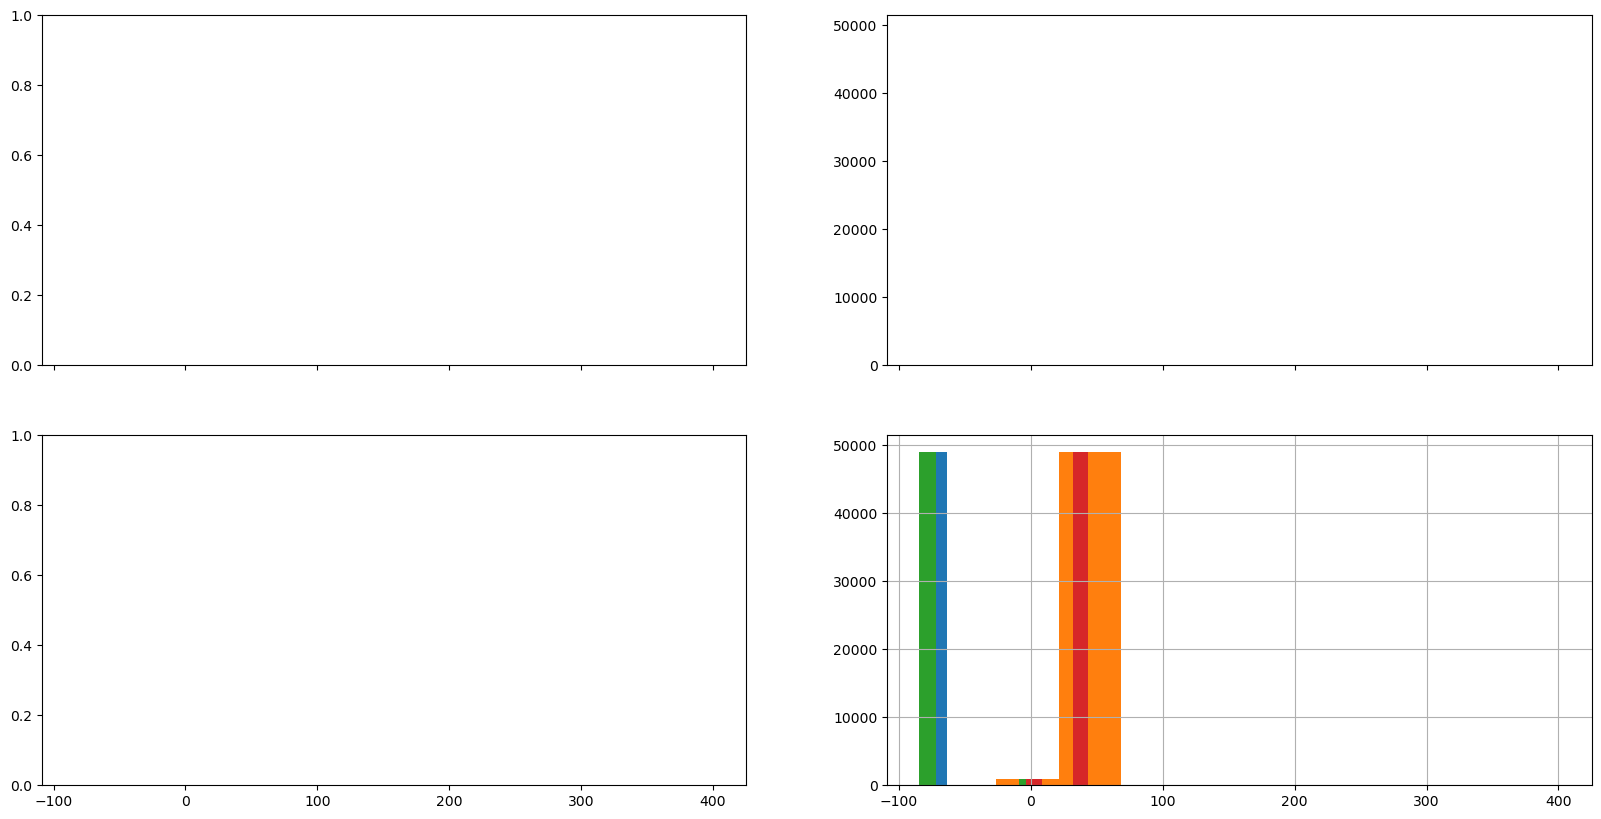

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
for column in taxi[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]:
    taxi[column].hist()

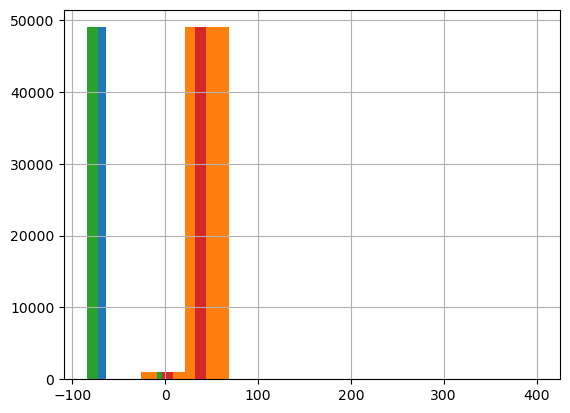

In [62]:
for column in taxi[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]:
    taxi[column].hist()

In [ ]:
sns.displot(data=taxi, x="pickup_longitude")